In [5]:
import numpy as np
import pylab

import pycbc.psd
import pycbc.noise
import pycbc.noise.reproduceable
from tqdm.notebook import tqdm

In [6]:

L_psd = pycbc.psd.aLIGOZeroDetHighPower(500, 4096/500, 0.1)

L_noise = pycbc.noise.reproduceable.colored_noise(L_psd,
                                                   start_time=0,
                                                   end_time=3000,
                                                   sample_rate=4096,
                                                   low_frequency_cutoff=0.1,
                                                   seed=0)

p_psd = pycbc.psd.analytical.flat_unity(length=500, delta_f=4096/500, low_freq_cutoff=0)
p_psd = p_psd * 0.1
p_noise = pycbc.noise.reproduceable.colored_noise(p_psd,
                                                   start_time=0,
                                                   end_time=3000,
                                                   sample_rate=L_noise.sample_rate,
                                                   low_frequency_cutoff=0.1,
                                                   seed=2)

len(L_noise): 12288000 len(p_noise): 12288000


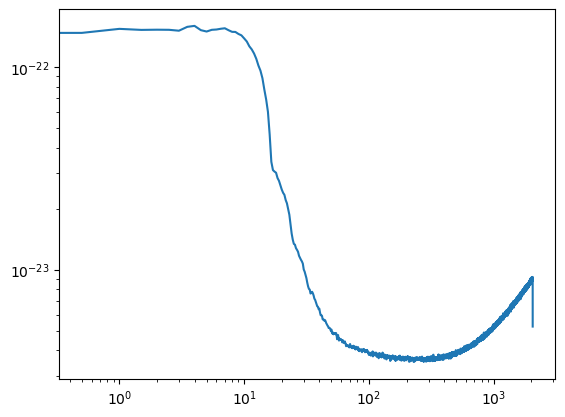

In [16]:
print("len(L_noise):", len(L_noise), "len(p_noise):", len(p_noise))
L_noise_psd = L_noise.psd(2)
pylab.loglog(L_noise_psd.sample_frequencies, L_noise_psd**(1/2))


Create 60Hz sine wave and ±1Hz modulated signal

In [8]:
pi = np.pi
t = L_noise.sample_times
f = 60
amplitude = 1/10

sin1 = amplitude * np.sin(2*pi*f*t)

#input_data is named p_data
p_data = sin1

f2 = 1
sin2 = np.sin(2*pi*f2*t)
modulated_sin = sin1 * (1 + sin2/10)

#target_data is named Lp_data
trans_func = 1e-21
Lp_data = L_noise + trans_func*modulated_sin


In [14]:
#Plot asd

p_data = pycbc.types.timeseries.TimeSeries(p_data, delta_t=L_noise.delta_t, epoch=L_noise.start_time) 
p_asd = p_data.psd(8)**(1/2)

modulated_sin = pycbc.types.timeseries.TimeSeries(modulated_sin, delta_t=L_noise.delta_t, epoch=L_noise.start_time)
modulated_sin_asd = modulated_sin.psd(8)**(1/2)

Lp_asd = (Lp_data.psd(8))**(1/2)

(30, 100)

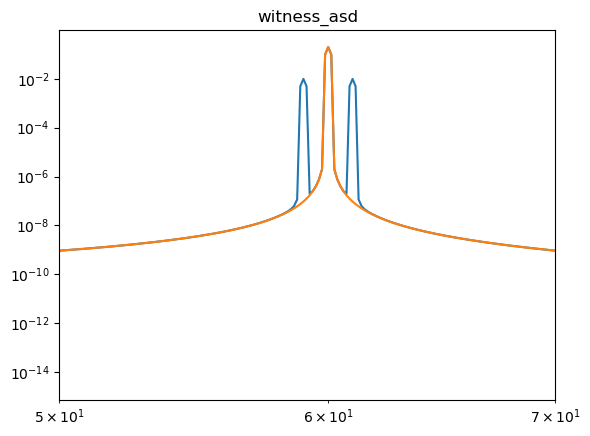

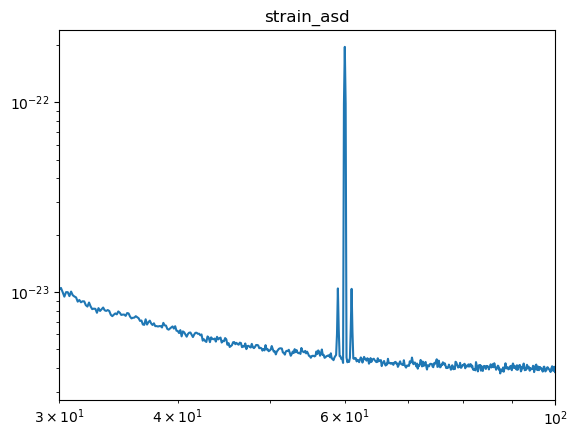

In [13]:
pylab.title("witness_asd")
pylab.loglog(modulated_sin_asd.sample_frequencies, modulated_sin_asd)
pylab.xlim(50, 70)

pylab.loglog(p_asd.sample_frequencies, p_asd)
pylab.xlim(50, 70)

pylab.figure()
pylab.title("strain_asd")
pylab.loglog(Lp_asd.sample_frequencies, Lp_asd)
pylab.xlim(30, 100)

Saving a file

In [13]:
p_data_np = np.array(p_data)
Lp_data_np = np.array(Lp_data)\

np.save("p60_train", p_data_np)
np.save("Lp60_train", Lp_data_np)